In [3]:
import tensorflow as tf
import json
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [9]:
gpus

[]

In [10]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
tf.test.is_gpu_available()

False

In [29]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [30]:
images.as_numpy_iterator().next()

b'data\\images\\92c4cbee-0655-11f0-827a-78af08054596.jpg'

In [31]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [32]:
images = images.map(load_image)

In [33]:
images.as_numpy_iterator().next()

array([[[ 91,  87,  78],
        [ 88,  84,  75],
        [ 87,  82,  76],
        ...,
        [143, 141, 146],
        [147, 145, 150],
        [154, 152, 157]],

       [[ 88,  84,  75],
        [ 87,  83,  74],
        [ 88,  83,  77],
        ...,
        [142, 140, 145],
        [143, 141, 146],
        [148, 146, 151]],

       [[ 86,  82,  73],
        [ 85,  81,  72],
        [ 87,  83,  74],
        ...,
        [142, 140, 145],
        [144, 139, 145],
        [146, 141, 147]],

       ...,

       [[ 36,  35,  43],
        [ 32,  31,  39],
        [ 31,  28,  37],
        ...,
        [ 51,  50,  48],
        [ 44,  39,  43],
        [ 43,  37,  41]],

       [[ 39,  36,  43],
        [ 33,  30,  37],
        [ 32,  29,  38],
        ...,
        [ 44,  38,  38],
        [ 45,  36,  41],
        [ 47,  36,  42]],

       [[ 41,  39,  44],
        [ 35,  33,  38],
        [ 35,  32,  41],
        ...,
        [ 50,  41,  42],
        [ 53,  42,  48],
        [ 49,  36,  43]]

In [34]:
image_generator = images.batch(4).as_numpy_iterator()

In [35]:
plot_images = image_generator.next()

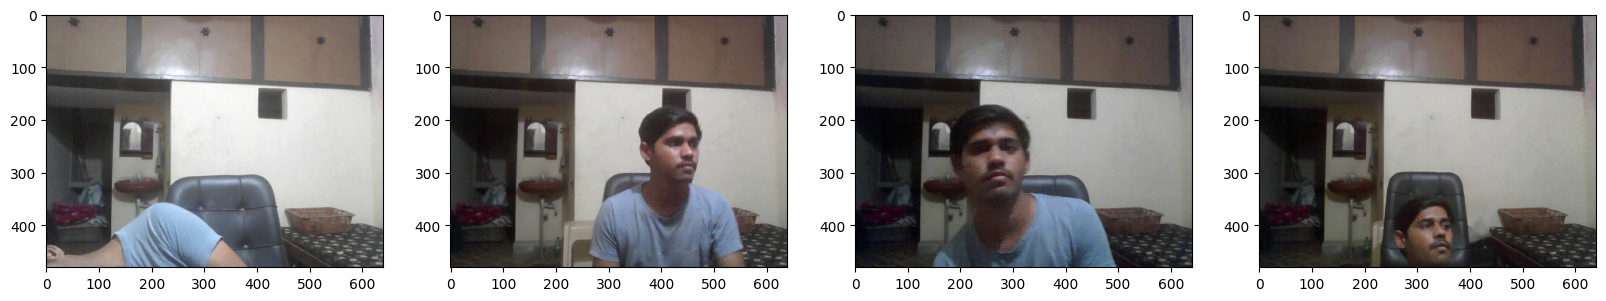

In [36]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)

plt.show()